<a href="https://colab.research.google.com/github/alirezakhaleghianaghizi/convex-optimization/blob/main/zerocrossing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

/usr/local/lib/python3.10/dist-packages/cvxpy/expressions/expression.py:612: UserWarning: 
This use of ``*`` has resulted in matrix multiplication.
Using ``*`` for matrix multiplication has been deprecated since CVXPY 1.1.
    Use ``*`` for matrix-scalar and vector-scalar multiplication.
    Use ``@`` for matrix-matrix and matrix-vector multiplication.
    Use ``multiply`` for elementwise multiplication.
This code path has been hit 36 times so far.

  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.10/dist-packages/cvxpy/expressions/expression.py:612: UserWarning: 
This use of ``*`` has resulted in matrix multiplication.
Using ``*`` for matrix multiplication has been deprecated since CVXPY 1.1.
    Use ``*`` for matrix-scalar and vector-scalar multiplication.
    Use ``@`` for matrix-matrix and matrix-vector multiplication.
    Use ``multiply`` for elementwise multiplication.
This code path has been hit 37 times so far.

  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.1

error :  0.10699381963159509


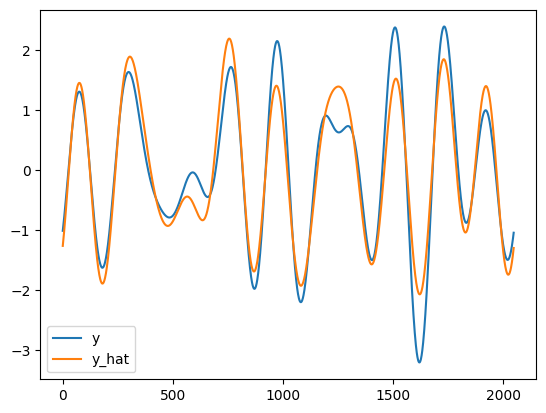

In [11]:
import numpy as np
import cvxpy as cvx
import matplotlib.pyplot as plt
import zero_crossings_data as zc

C = np.zeros((zc.n, zc.B))
S = np.zeros((zc.n, zc.B))
for j in range(zc.B):
  for i in range(zc.n):
    C[i, j] = np.cos(2 * np.pi * (zc.f_min + j) *(i+1) / zc.n)
    S[i, j] = np.sin(2 * np.pi * (zc.f_min + j) * (i+1) / zc.n)
A = np.hstack((C, S))
x = cvx.Variable(2 * zc.B)
cvx_obj=cvx.Minimize( cvx.norm(A * x))
constraints = [np.multiply(zc.s, A * x) >= 0,zc.s.T * (A * x) == zc.n]
problem = cvx.Problem(cvx_obj, constraints)
problem.solve()
y_hat = np.dot(A, x.value)
print('error : ',(sum(abs(zc.y - y_hat)**2) / sum(abs(zc.y)**2)))
plt.figure()
plt.plot(zc.y, label='y')
plt.plot(y_hat, label='y_hat')
plt.legend()
plt.show()